In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data

In [2]:
activity = pd.read_csv('activity_data.csv')

In [3]:
hotel = pd.read_csv('hotel_data.csv')

## Exploratory Data Analysis

### Activity dataset

In [4]:
print(activity.shape)
activity.head(3)

(1577114, 6)


,date,user_id,user_country,device,hotel_id,user_action
0,2019-01-07,314066,Italy,iphone_native_app,570101,view
1,2019-01-02,314066,Italy,iphone_native_app,6002536,view
2,2019-01-19,84981,United Kingdom,iphone_native_app,1858923,view


#### Sizing

In [5]:
print('There are %s user-hotel actions'% len(activity)) 
print('There are %s unique users'% len(activity['user_id'].unique()))
print('There are %s unique users with booking'% len(activity[activity.user_action=='booking']['user_id'].unique()))
print('There are %s unique hotels'% len(activity['hotel_id'].unique())) 
print('There are %s unique hotels with booking'% len(activity[activity.user_action=='booking']['hotel_id'].unique()))

There are 1577114 user-hotel actions
There are 363619 unique users
There are 8203 unique users with booking
There are 1057 unique hotels
There are 563 unique hotels with booking


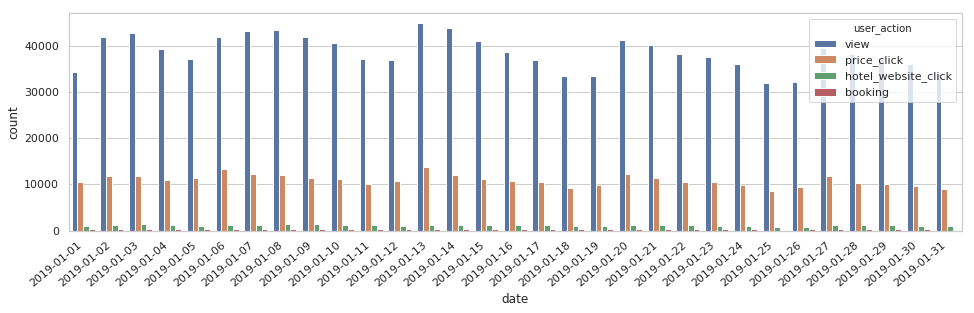

In [6]:
fig, ax = plt.subplots(figsize=(16, 4))
ax=sns.countplot( x='date', hue="user_action",data=activity.sort_values('date'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Type of user_action

In [7]:
activity['user_action'].value_counts()

view                   1194404
price_click             338356
hotel_website_click      35636
booking                   8718
Name: user_action, dtype: int64

In [8]:
print('Example of funnel')
activity[(activity.user_id==306169) &(activity.hotel_id==80110)]

Example of funnel


,date,user_id,user_country,device,hotel_id,user_action
442,2019-01-19,306169,Sweden,osx,80110,price_click
444,2019-01-19,306169,Sweden,osx,80110,booking
445,2019-01-19,306169,Sweden,osx,80110,view


#### User-hotel interactions

Text(0, 0.5, 'activity count')

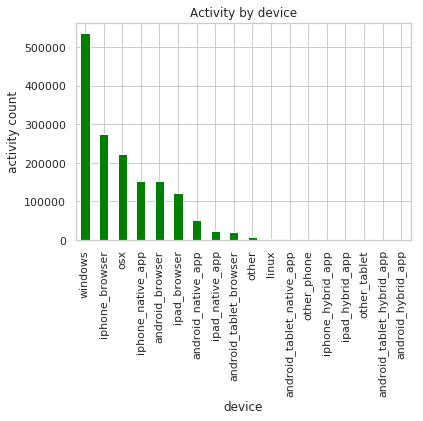

In [9]:
# Activity by device
ax=activity['device'].value_counts().plot(kind='bar', color='green', title = 'Activity by device' )
ax.set_xlabel("device")
ax.set_ylabel("activity count")

Text(0, 0.5, 'activity count')

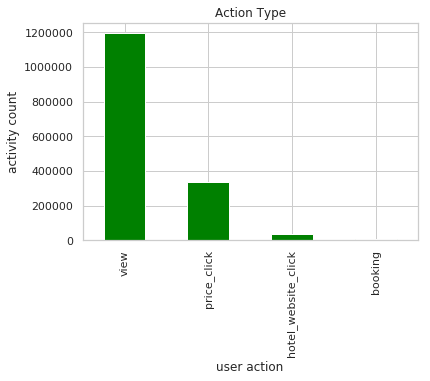

In [10]:
# Activity by device
ax=activity['user_action'].value_counts().plot(kind='bar', color='green', title = 'Action Type' )
ax.set_xlabel("user action")
ax.set_ylabel("activity count")

Text(0, 0.5, 'activity count')

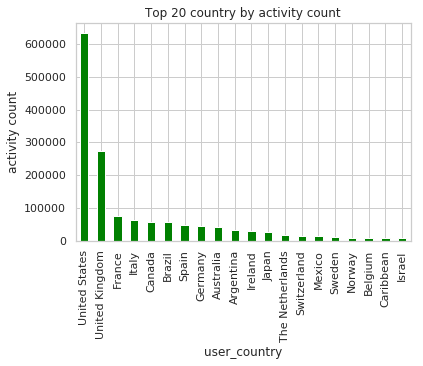

In [11]:
# Interaction Type
ax=activity['user_country'].value_counts().head(20).plot(kind='bar', color='green', title = 'Top 20 country by activity count' )
ax.set_xlabel("user_country")
ax.set_ylabel("activity count")

Text(0, 0.5, 'activity count')

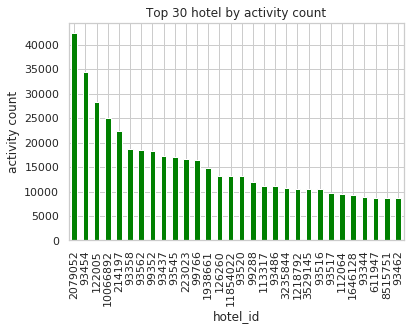

In [12]:
# popular hotels
ax=activity['hotel_id'].value_counts().head(30).plot(kind='bar', color='green', title = 'Top 30 hotel by activity count' )
ax.set_xlabel("hotel_id")
ax.set_ylabel("activity count")

### Hotel dataset EDA

In [13]:
print(hotel.shape)
hotel.head(3)

(1057, 9)


,hotel_id,hotel_name,city_name,star_rating,bubble_score,review_count,hotel_type,brand_name,parent_brand_name
0,75737,Night Theater District,New York City,4.0,40.0,2291,Hotel,Night Hotel,Wyndham Hotel Group
1,93401,Heritage Hotel New York City,New York City,2.5,35.0,968,Hotel,None,NaN
2,224217,Clarion Hotel Park Avenue,New York City,2.5,35.0,462,Hotel,Clarion,"Choice Hotels International, Inc."


In [14]:
print('There are %s unique rows'% len(hotel['hotel_id'])) 
print('There are %s unique hotels'% len(hotel['hotel_id'].unique()))


There are 1057 unique rows
There are 1057 unique hotels


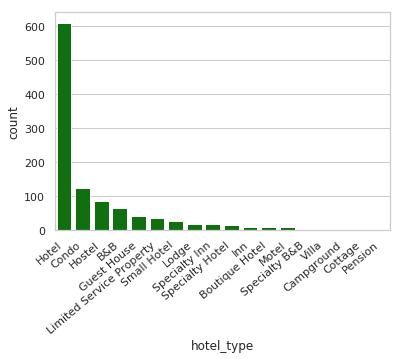

In [15]:
# Hotel type
ax=sns.countplot( x='hotel_type', color='green',data=hotel.sort_values('hotel_type'),
                 order=hotel['hotel_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

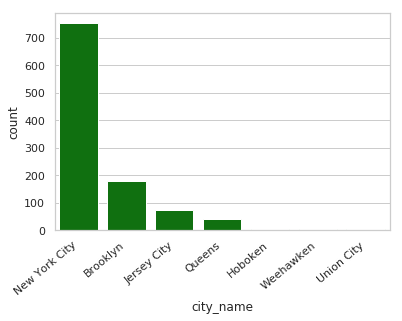

In [16]:
# Hotel city name
ax=sns.countplot( x='city_name', color='green',data=hotel.sort_values('hotel_type'),
                 order=hotel['city_name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Text(0.5, 1.0, 'Hotels by star_rating')

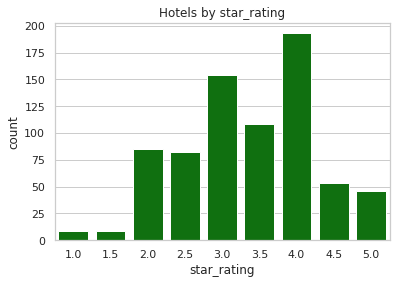

In [17]:
# Star Rating
sns.countplot(x="star_rating", data=hotel, color='green').set_title("Hotels by star_rating")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


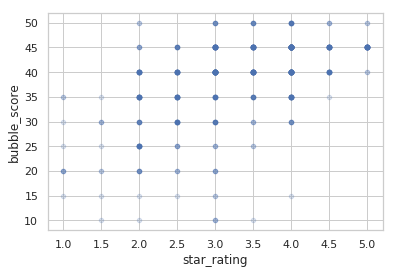

In [18]:
hotel.plot.scatter('star_rating','bubble_score', alpha=0.2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


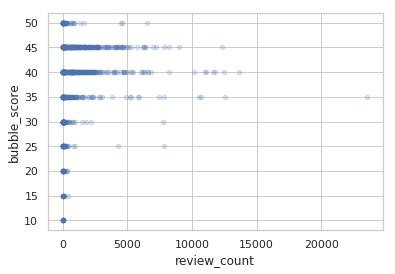

In [19]:
hotel.plot.scatter('review_count','bubble_score', alpha=0.2)

AttributeError: 'Series' object has no attribute 'order'